# Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 한글 폰트 지원
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

------------------------

# 시각화의 목적에 따른 플롯

- 데이터 분포 파악
- 데이터 관계 파악
- **집단간 비교**
- **시간에 따른 변화**

## 3. 집단 간 비교

: 그룹별 데이터 분포 비교
- FacetGrid를 이용한 범주형 플롯 시각화
    

- 막대그래프(barplot)
    - matplotlib.pyplot.bar()
    - matplotlib.pyplot.barh()
    - DataFrame.plot(kind='bar'|'barh')
    - DataFrame.plot.bar()
    - DataFrame.plot.barh()
    - seaborn.barplot()
    - seaborn.catplot(kind='bar')

- 바이올린플롯(violin plot)
    - matplotlib.pyplot.violinplot()
    - seaborn.viloinplot()
    - seaborn.catplot(kind='violin')

- strip plot
    - seaborn.stripplot()
    - seaborn.catplot(kind='strip')

- swarm plot
    - seaborn.swarmplot()
    - seaborn.catplot(kind='swarm')

### 1) 막대 그래프(barplot)

- 범주형 데이터의 범주별 빈도 비교

In [3]:
df= sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### ① matplotlib.pyplot의 막대그래프 함수

- 형식
    - bar(x, height, width=0.8, bottom=None, align='center', data=None,...)
    - barh(y, width, height=0.8, left=None, *, align='center', **kwargs)

In [5]:
surv_cnt= df.survived.value_counts()
surv_cnt

survived
0    549
1    342
Name: count, dtype: int64

In [6]:
surv_cnt.index=['사망','생존']
surv_cnt

사망    549
생존    342
Name: count, dtype: int64

<BarContainer object of 2 artists>

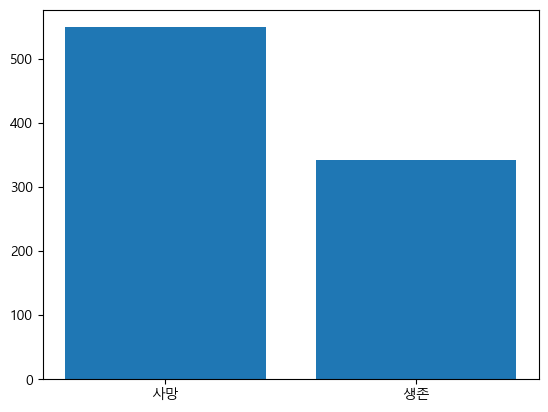

In [8]:
plt.bar(x=surv_cnt.index,height=surv_cnt)

### ② seaborn의 막대그래프 함수

- 형식1
    - barplot(x=None, y=None, hue=None, data=None, order=None, orient='v'|'h', dodge=True, ...)
    - https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
    
    

- 형식2
    - catplot(kind='bar', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.barplot()

<Axes: xlabel='survived'>

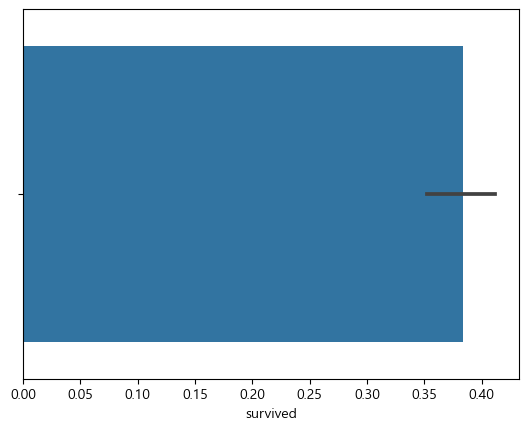

In [10]:
sns.barplot(data=df,x='survived')

In [12]:
pd.crosstab(index=df.sex,columns=df.survived, normalize=True, margins=True)

survived,0,1,All
sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


<Axes: xlabel='sex', ylabel='survived'>

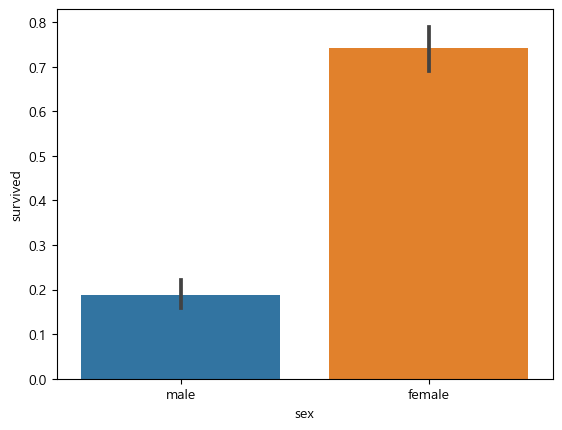

In [14]:
sns.barplot(data=df,x='sex',y='survived')

<Axes: xlabel='sex', ylabel='survived'>

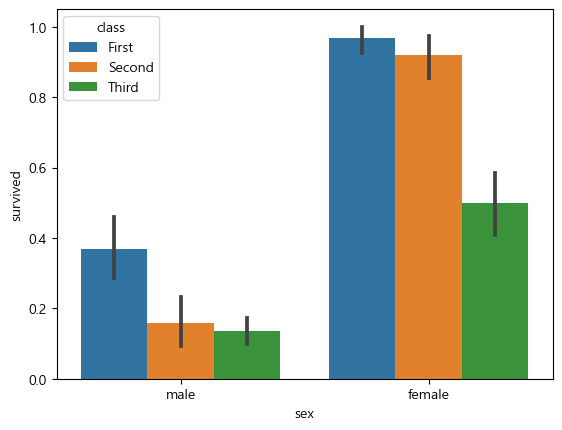

In [15]:
sns.barplot(data=df,x='sex',y='survived',hue='class')

<Axes: xlabel='class', ylabel='survived'>

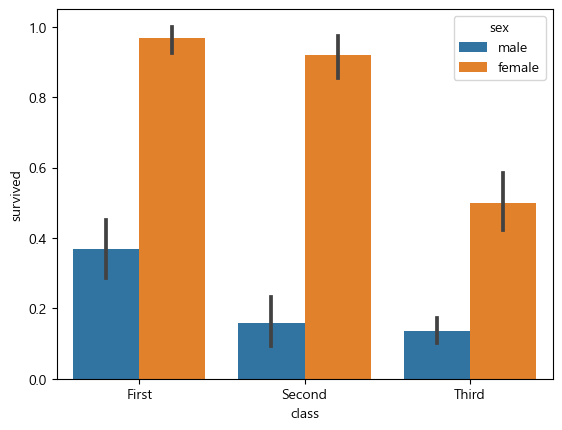

In [17]:
sns.barplot(data=df,x='class',y='survived',hue='sex')

### sns.catplot(kind='bar')

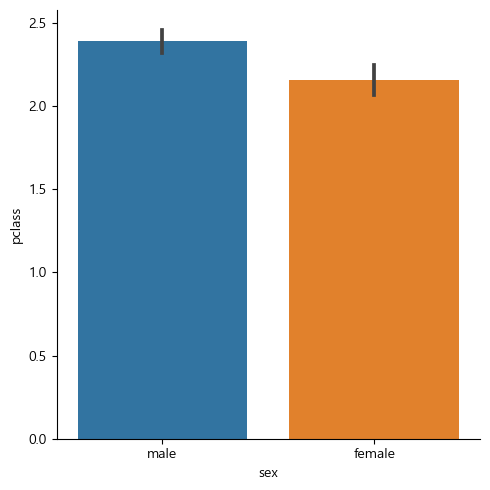

In [19]:
sns.catplot(kind='bar',data=df,x='sex',y='pclass')

In [21]:
pd.crosstab(df.sex, df.pclass, normalize=True)

pclass,1,2,3
sex,,,
female,0.105499,0.085297,0.161616
male,0.136925,0.121212,0.389450


#### catplot()의 col인수
- 윈도우에 범주별 막대그래프를 따로 표현

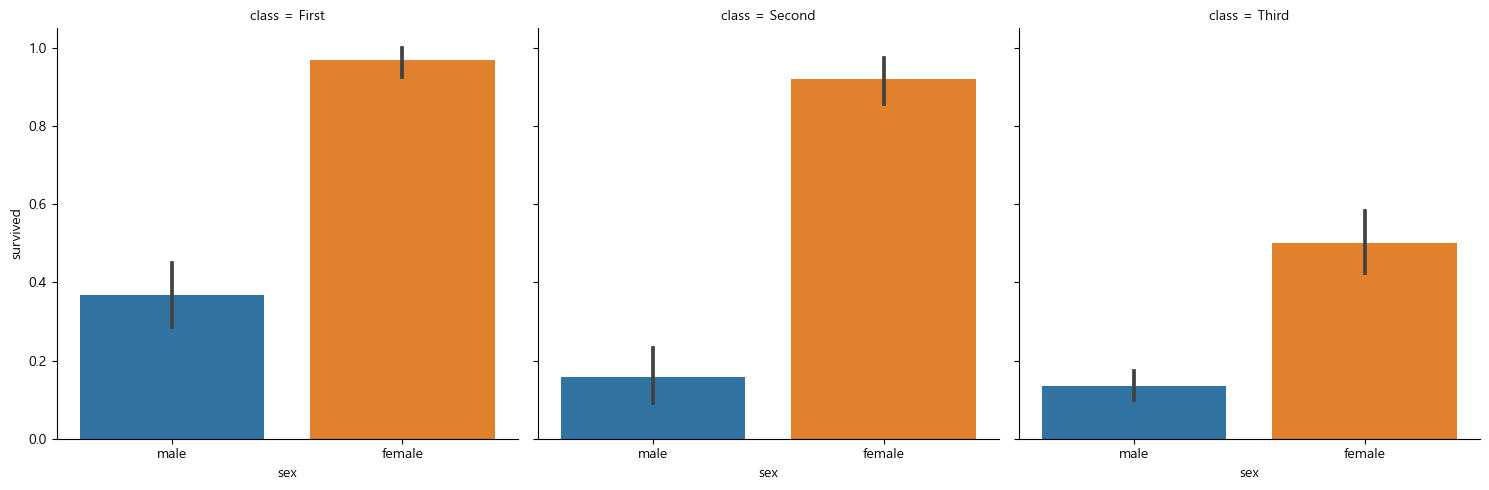

In [23]:
sns.catplot(kind='bar',data=df,x='sex',y='survived', col='class')
plt.show()

In [24]:
tips = sns.load_dataset('tips')
ex1 = tips.groupby('day')['total_bill'].mean()
ex1

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [25]:
ex1=ex1.reset_index()
ex1

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


<Axes: xlabel='day', ylabel='total_bill'>

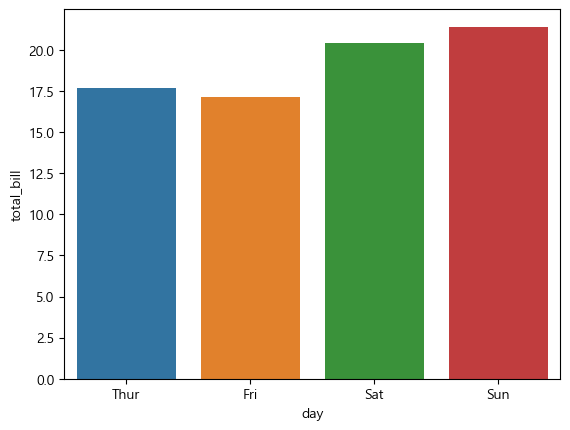

In [26]:
sns.barplot(data=ex1, x='day',y='total_bill')

In [27]:
ex2 = pd.DataFrame({'Cate':'A B A A B A B A'.split(),
                   'value':[10,13,12,8,9,5,10,20]})
ex2

,Cate,value
0,A,10
1,B,13
2,A,12
3,A,8
4,B,9
5,A,5
6,B,10
7,A,20


<Axes: xlabel='Cate', ylabel='value'>

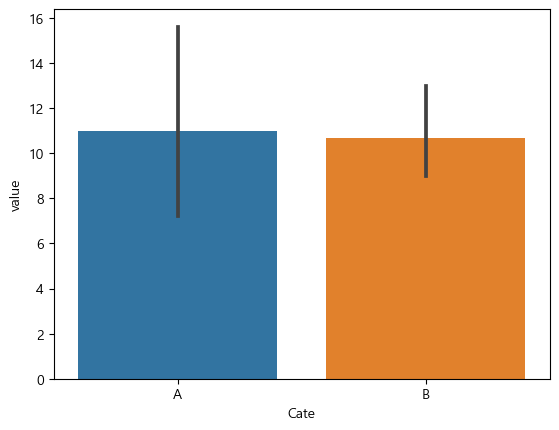

In [31]:
sns.barplot(data=ex2,x='Cate',y='value')

In [32]:
df.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [36]:
df.pivot_table(values='survived' , index='sex')

,survived
sex,
female,0.742038
male,0.188908


<Axes: xlabel='sex', ylabel='survived'>

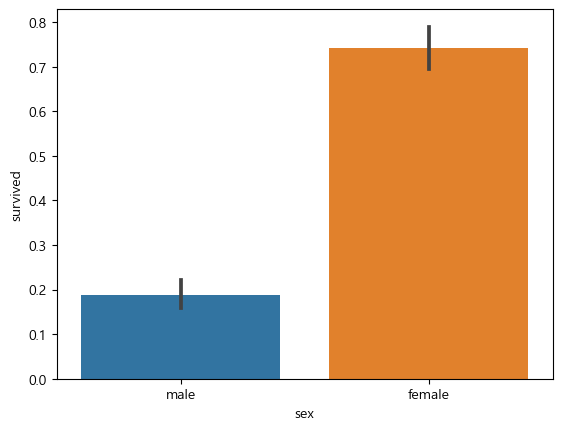

In [37]:
sns.barplot(data=df, x='sex', y='survived')

### 2) 바이올린 플롯

- 박스플롯의 기능과 함께 데이터의 커널밀도곡선을 제시
- 데이터의 분포와 범위를 한눈에 보기 쉽게 나타내는 그래프
- 더 실제에 가까운 분포를 알 수 있음

#### 예제 데이터. iris dataset

In [38]:
iris=sns.load_dataset('iris')

### ① matplotlib.pyplot의 바이올린 플롯 함수

- 형식
    - violinplot(dataset, positions=None, vert=True, widths=0.5,  *, data=None)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html

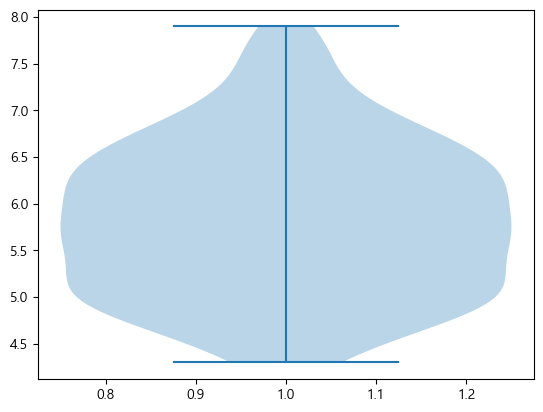

In [41]:
plt.violinplot(iris.sepal_length)
plt.show()

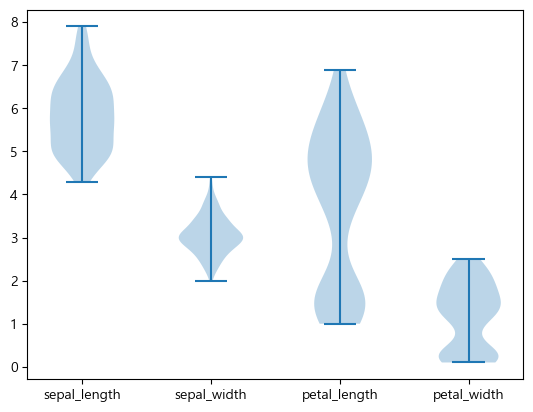

In [43]:
# 범주형 데이터를 제외한 수치형 데이터만
plt.violinplot(iris.iloc[:,:-1])
plt.xticks([1,2,3,4],iris.columns[:-1])
plt.show()

### ② seaborn의 바이올린 플롯 함수

- 형식1
    - violinplot(x=None, y=None, hue=None, data=None, order=None, ...)
    - https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
    
    
- 형식2
    - catplot(kind='violin', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.violinplot()

<Axes: xlabel='sepal_length'>

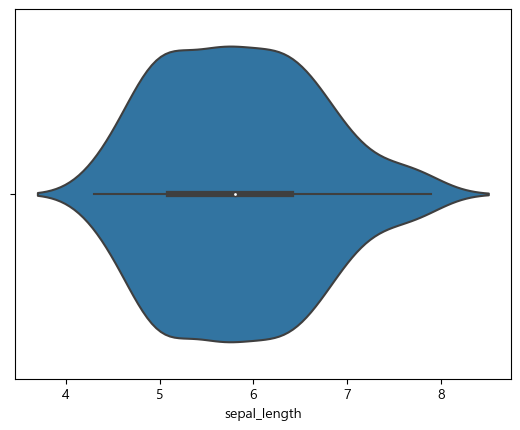

In [45]:
sns.violinplot(data=iris, x='sepal_length')

<Axes: >

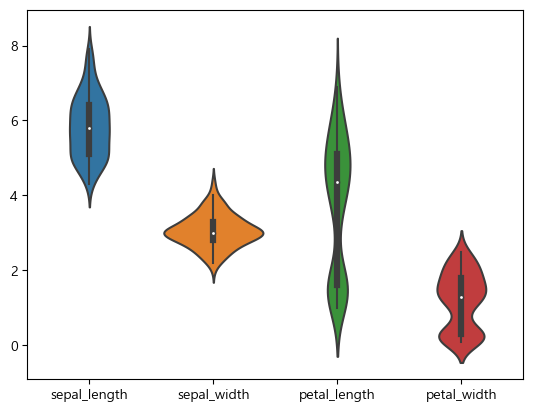

In [49]:
# seaborn은 범주형데이터를 제외하고 수치형 데이터만 뽑아서 자동으로 만듦.
# 중간에 점은 median
sns.violinplot(iris)

<Axes: xlabel='species', ylabel='petal_length'>

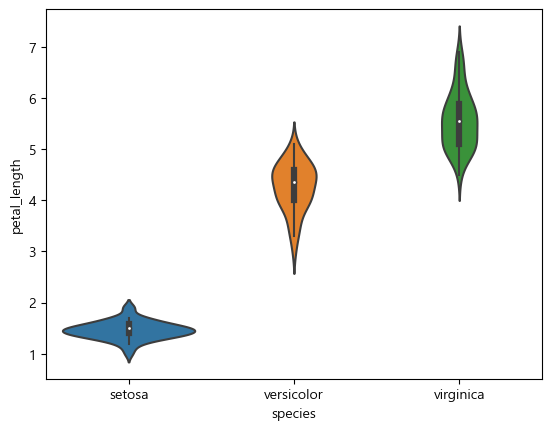

In [50]:
sns.violinplot(data=iris, x='species', y='petal_length')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

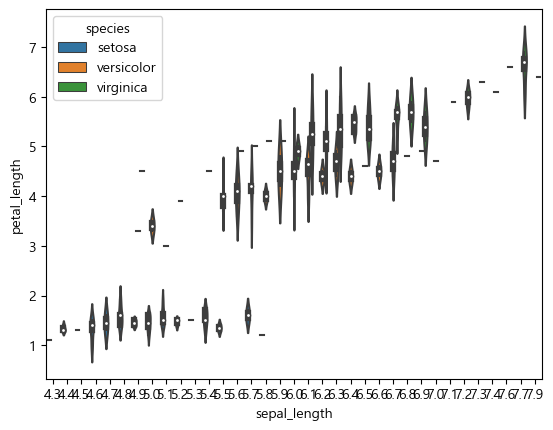

In [52]:
sns.violinplot(data=iris, x='sepal_length',hue='species', y='petal_length')

### sns.catplot(kind='violin')

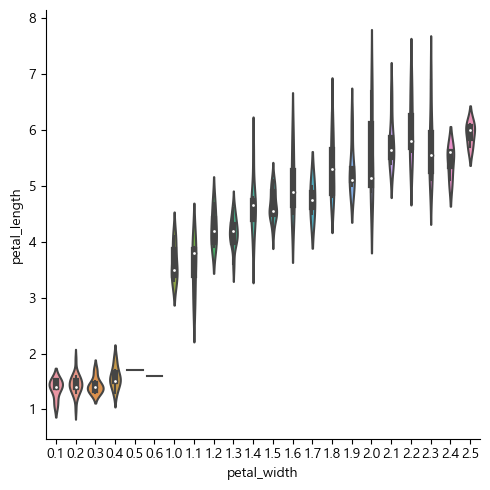

In [53]:
sns.catplot(kind='violin', data=iris, x='petal_width', y='petal_length')

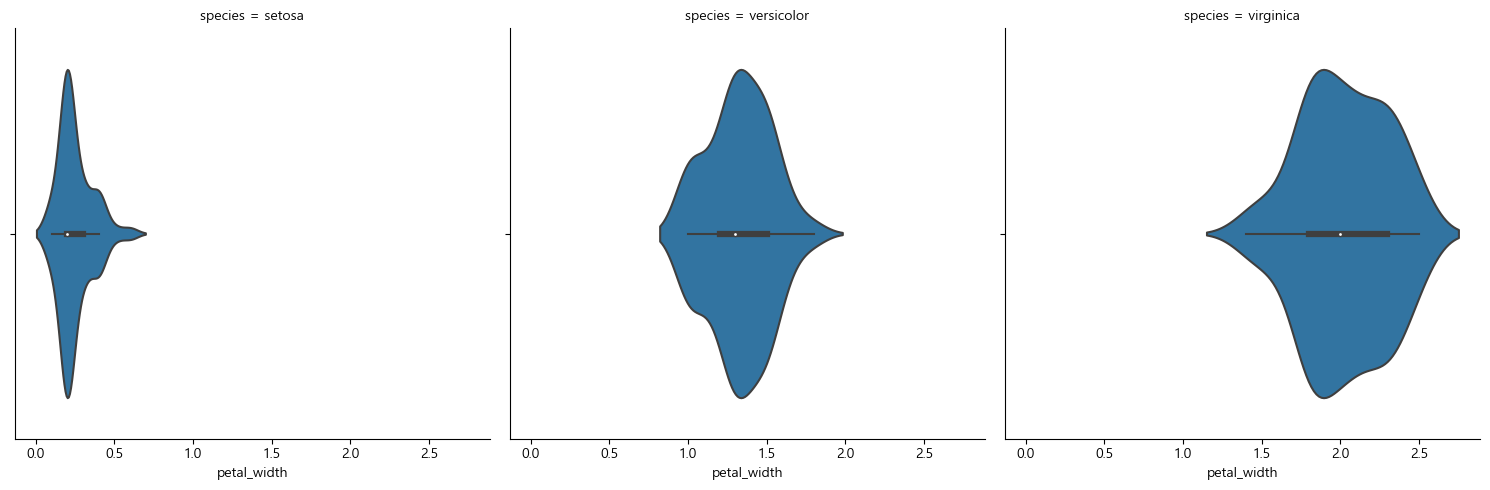

In [54]:
sns.catplot(kind='violin', data=iris, x='petal_width', col='species')

### 3) Strip plot

- 겹치는 데이터를 파악할 수 있도록 같은 값에 jitter를 통해 겹치지 않게 그려주는 그래프

### seaborn의 strip plot 함수

- 형식1
    - stripplot(x=None, y=None, hue=None, data=None, order=None, jitter=True, ...)
    - https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot
    
    
- 형식2
    - catplot(kind='strip', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.stripplot()

<Axes: xlabel='sepal_length'>

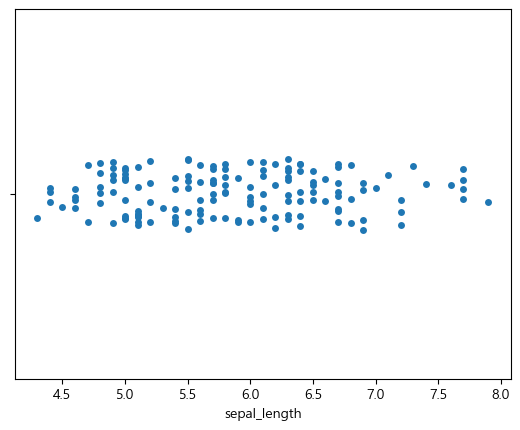

In [55]:
sns.stripplot(data=iris, x='sepal_length')

<Axes: xlabel='sepal_length'>

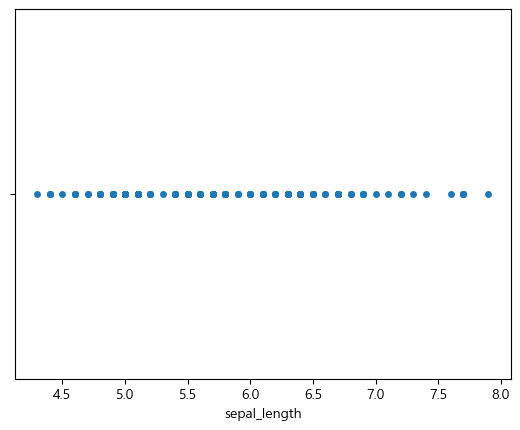

In [56]:
sns.stripplot(data=iris, x='sepal_length', jitter=False)

<Axes: xlabel='petal_length'>

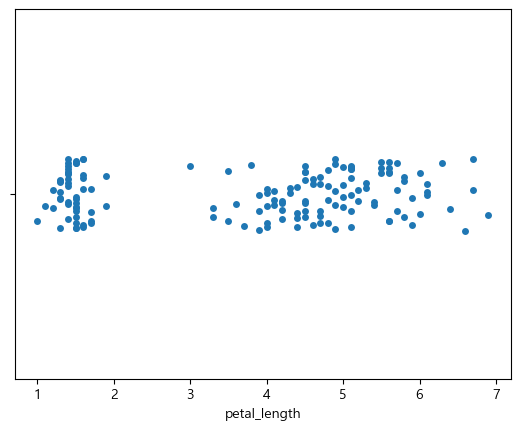

In [57]:
sns.stripplot(data=iris, x='petal_length')

<Axes: xlabel='species', ylabel='petal_length'>

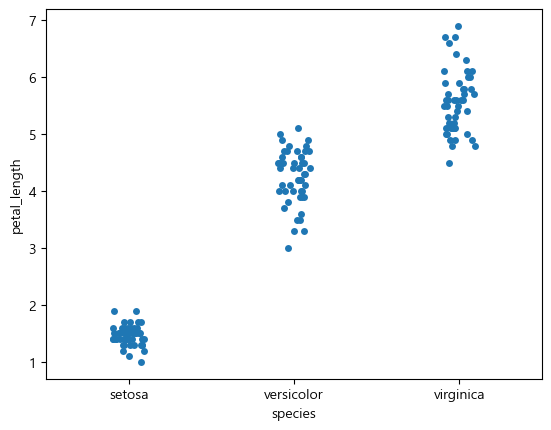

In [59]:
sns.stripplot(data=iris, x='species', y='petal_length')

### sns.catplot(kind='strip')

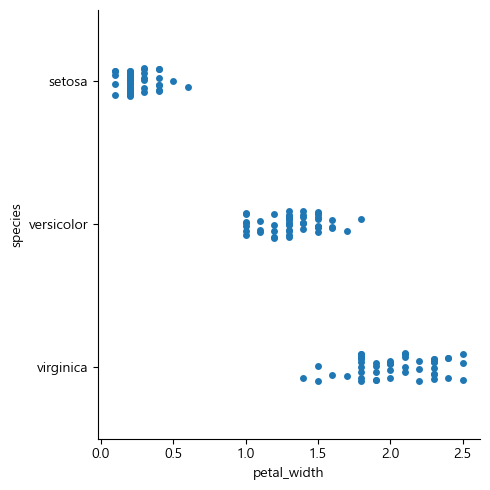

In [60]:
sns.catplot(kind='strip', data=iris, x='petal_width', y='species')

### 4) Swarm plot

- 데이터의 분산까지 고려하여 겹치는 데이터를 겹치지 않게 그려주는 그래프
- 데이터가 퍼져 있는 정도를 입체적으로 볼 수 있음

### seaborn의 swarm plot 함수

- 형식1
    - swarmplot(x=None, y=None, hue=None, data=None, order=None, ...)
    - https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot
    
    

- 형식2
    - catplot(kind='swarm', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

<Axes: xlabel='sepal_length'>

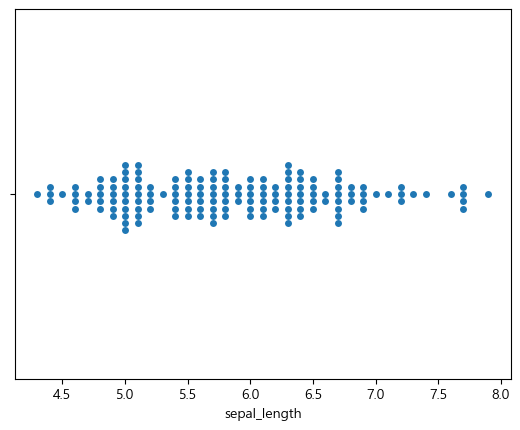

In [61]:
sns.swarmplot(data=iris, x='sepal_length')

<Axes: xlabel='petal_length', ylabel='species'>

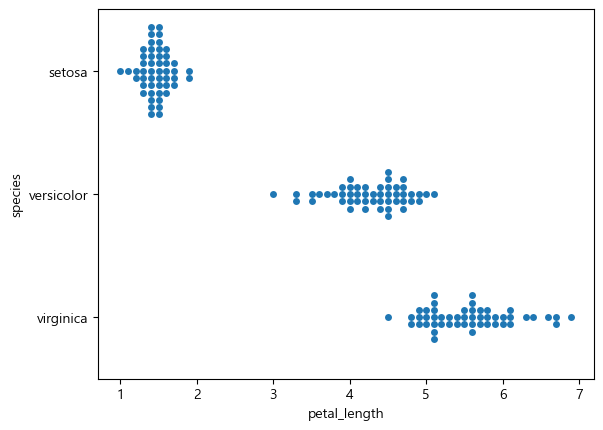

In [62]:
sns.swarmplot(data=iris, x='petal_length', y='species')

In [63]:
iris.pivot_table('petal_length',index='species',aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
species,,,,,,,,
setosa,1.4,1.50,1.575,50.0,1.9,1.462,1.0,0.173664
versicolor,4.0,4.35,4.600,50.0,5.1,4.260,3.0,0.469911
virginica,5.1,5.55,5.875,50.0,6.9,5.552,4.5,0.551895


#### box plot과 swarmplot을 같이 표시

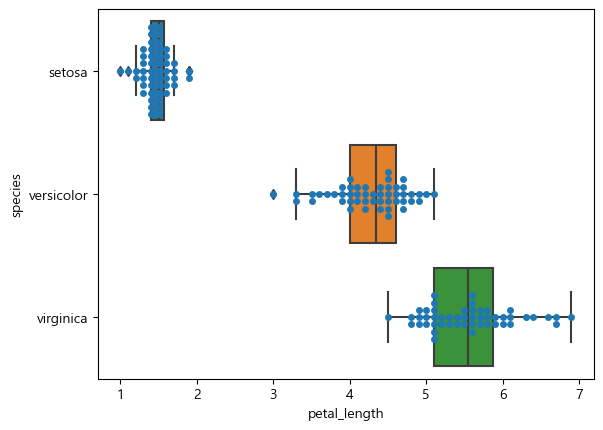

In [64]:
sns.swarmplot(data=iris, x='petal_length', y='species')
sns.boxplot(data=iris, x='petal_length', y='species')
plt.show()

------

## 4. 시간에 따라 변화하는 데이터 표현

- 시계열 데이터 시각화
- 시간에 따른 추세 파악
- 선그래프(line plot)
    - matplotlib.pyplot.plot()
    - seaborn.lineplot()
    - seaborn.relplot(kind='line')
    - DataFrame.plot(kind='line')
    - DataFrame.plot.line()

### 예제 데이터. 미세먼지

In [65]:
dust = pd.read_excel('data/fine_dust.xlsx', index_col='area')
dust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Seoul to Jeju
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    14 non-null     float64
 1   2002    14 non-null     float64
 2   2003    14 non-null     float64
 3   2004    14 non-null     float64
 4   2005    14 non-null     float64
 5   2006    14 non-null     int64  
 6   2007    14 non-null     int64  
 7   2008    14 non-null     float64
 8   2009    14 non-null     float64
 9   2010    14 non-null     float64
 10  2011    14 non-null     int64  
 11  2012    14 non-null     float64
 12  2013    14 non-null     float64
 13  2014    14 non-null     float64
 14  2015    14 non-null     float64
 15  2016    14 non-null     float64
 16  2017    14 non-null     float64
 17  2018    14 non-null     float64
 18  2019    14 non-null     float64
dtypes: float64(16), int64(3)
memory usage: 2.2+ KB


### ① matplotlib의 plot()을 이용하여 라인플롯 그리기

- 형식 : plot(x, y, fmt, ..., data=None, scalex=True, scaley=True, **kwargs)
    - x, y : array-like or scalar
    - fmt : str, optional

In [70]:
dust.head(3)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
area,,,,,,,,,,,,,,,,,,,
Seoul,71.0,76.0,69.0,61.0,58.0,60,61,55.0,54.0,49.0,47,41.0,45.0,46.0,45.0,48.0,44.0,40.0,42.0
Gyeonggi,71.0,74.0,68.0,67.0,65.0,68,66,60.0,60.0,58.0,56,49.0,54.0,54.0,53.0,53.0,51.0,44.0,46.0
Incheon,52.0,57.0,61.0,62.0,61.0,68,64,57.0,60.0,55.0,55,47.0,49.0,49.0,53.0,49.0,46.0,40.0,43.0


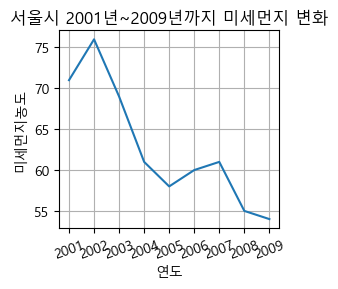

In [97]:
# 2001~2009년도 서울 미세먼지 라인그래프
plt.figure(figsize=(3,3))
plt.plot(dust.loc['Seoul',2001:2009])
plt.xticks(np.arange(2001,2010), rotation=20)
plt.xlabel('연도')
plt.ylabel('미세먼지농도')
plt.grid()
plt.title('서울시 2001년~2009년까지 미세먼지 변화')
plt.tight_layout()
plt.show()

### ② seaborn의 선그래프 함수 이용

- 형식1.
    - lineplot(* , x=None, y=None, hue=None, size=None, style=None, data=None, palette=None,...)
    - https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
    
    

- 형식2.
    - relplot(kind='line', x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

### sns.lineplot()

In [98]:
dustT= dust.T

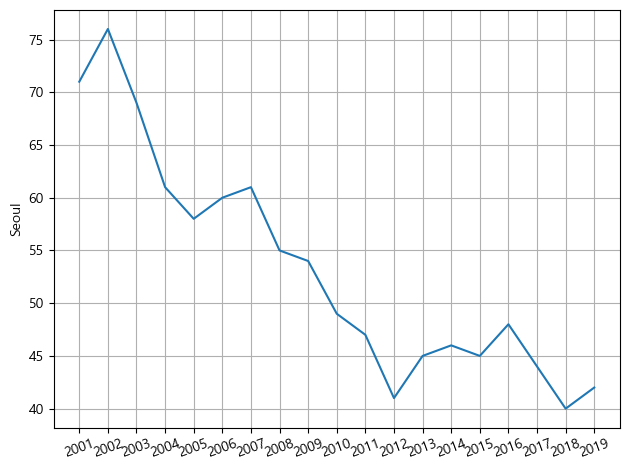

In [102]:
sns.lineplot(data=dustT, x=dustT.index, y='Seoul')
plt.xticks(np.arange(2001,2020),rotation=20)
plt.tight_layout()
plt.grid()
plt.show()

In [107]:
dust2 = dust.loc[:,2016:2019]

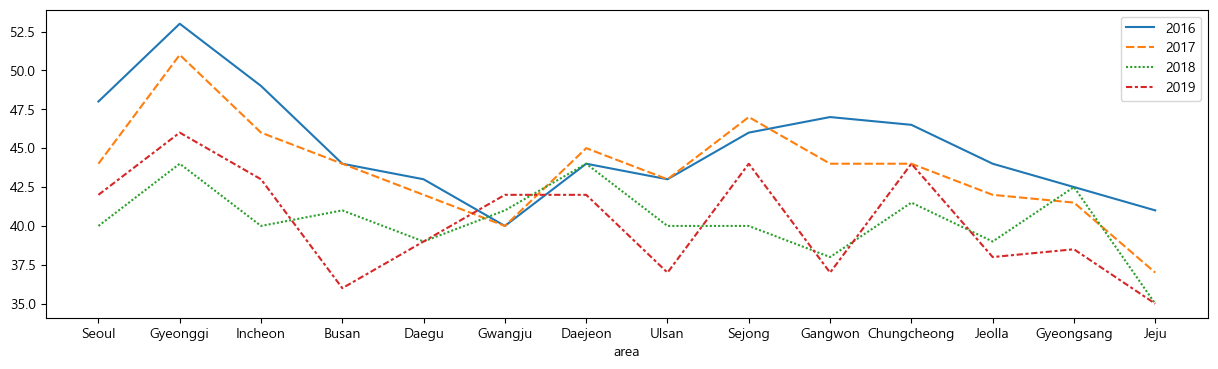

In [110]:
plt.figure(figsize=(15,4))
sns.lineplot(data=dust2)
plt.show()

#### seaborn의 set_style() 이용하여 라인플롯 그리기

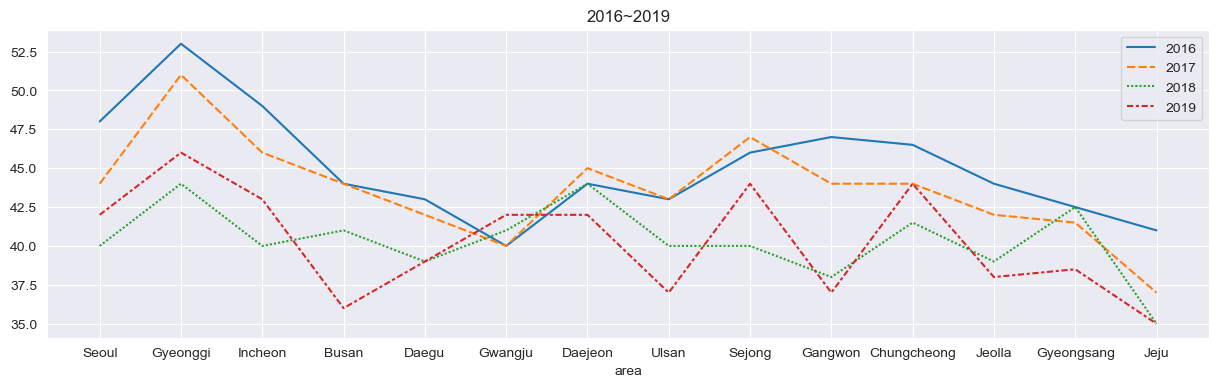

In [114]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,4))
sns.lineplot(data=dust2)
plt.title('2016~2019')
plt.show()

**sns.despine() 함수를 이용한 그림 테두리 제거**

: sns.despine(right=True,left=True,top=False,bottom=False)

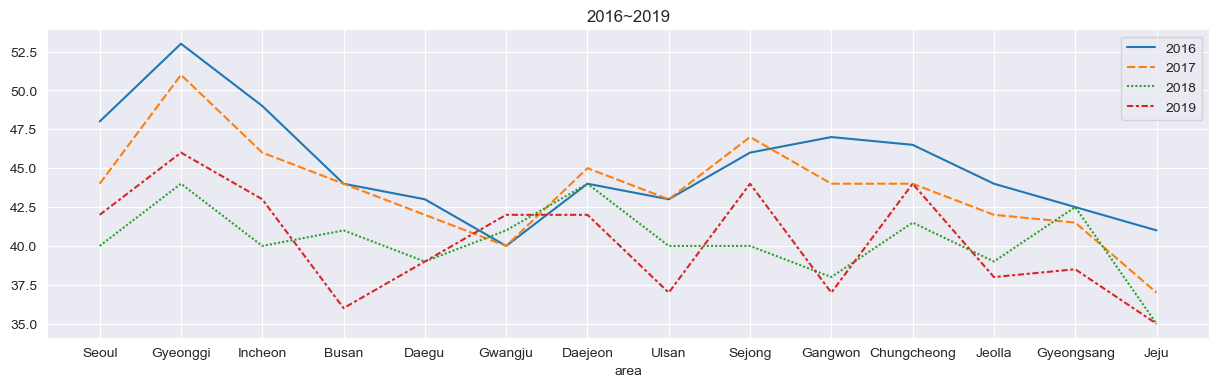

In [117]:
plt.figure(figsize=(15,4))
sns.lineplot(data=dust2)
plt.title('2016~2019')
sns.despine(right=True, left=False)
plt.show()

### ③ pandas.DataFrame.plot(kind='line') 이용

<Axes: xlabel='area'>

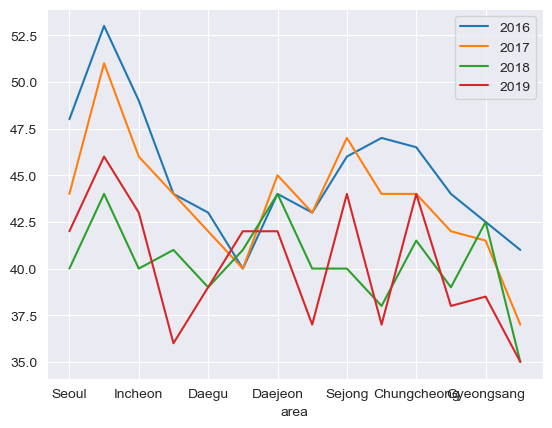

In [118]:
dust2.plot.line()

------------------------------------------------

## 5. 히트맵(heatmap)

### (1) seaborn의 heatmap() 함수 사용

- 범주형-범주형-수치형 자료의 시각화
    - X축과 Y축에 2개의 범주형 자료의 계급(class)별로 연속형 자료를 집계한 자료의 시각화
- 집계한 값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화


- 형식 : heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)


- https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

### 예제 데이터
- 캐글 자전거수요예측 데이터
- https://www.kaggle.com/competitions/bike-sharing-demand

In [119]:
bike= pd.read_csv('data/bike.csv')
bike.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [120]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- datetime : hourly date + timestamp (날짜와 시간)

- season : 1 = spring, 2 = summer, 3 = fall, 4 = winter (계절)

- holiday : whether the day is considered a holiday (휴일)

- workingday ; whether the day is neither a weekend nor holiday (평일)

- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy (맑은 날씨)
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (안개)
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (가벼운 눈, 비)
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (폭설, 폭우)

- temp : temperature in Celsius (온도)

- atemp : “feels like” temperature in Celsius (체감 온도)

- humidity : relative humidity (상대 습도)

- windspeed : wind speed (풍속)

- casual : number of non-registered user rentals initiated (비회원 대여량)

- registered : number of registered user rentals initiated (회원 대여량)

- count : number of total rentals (총 대여량)

In [123]:
bike['datetime']= pd.to_datetime(bike['datetime'])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [124]:
bike.datetime[:10]

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
5   2011-01-01 05:00:00
6   2011-01-01 06:00:00
7   2011-01-01 07:00:00
8   2011-01-01 08:00:00
9   2011-01-01 09:00:00
Name: datetime, dtype: datetime64[ns]

In [125]:
bike['hour']=bike.datetime.dt.hour
bike.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2


In [126]:
bike['moth']=bike.datetime.dt.month
bike['day']=bike.datetime.dt.day

In [127]:
bike.hour.value_counts().sort_index()

hour
0     455
1     454
2     448
3     433
4     442
5     452
6     455
7     455
8     455
9     455
10    455
11    455
12    456
13    456
14    456
15    456
16    456
17    456
18    456
19    456
20    456
21    456
22    456
23    456
Name: count, dtype: int64

In [128]:
bike['hours']=pd.cut(bike.hour, bins=[-0.1,2,5,8,11,14,17,20,23],
      labels=['0~2','3~5','6~8','9~11','12~14','15~17','18~20','21~23'])

In [131]:
bike.hours.value_counts().sort_index()

hours
0~2      1357
3~5      1327
6~8      1365
9~11     1365
12~14    1368
15~17    1368
18~20    1368
21~23    1368
Name: count, dtype: int64

#### sns.heatmap() 사용하여 계절(season)과 시간대별(hours) 자전거  총대여량 시각화

#### 데이터 피봇팅

- pivot() 함수
    - 형식1. pd.pivot(data, index=None, columns=None, values=None)
    - 형식2. 데이터프레임.pivot(index=None, columns=None, values=None)
    - https://pandas.pydata.org/docs/reference/api/pandas.pivot.html
    
    
- pivot_table() 함수
    - 형식1. pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) 
    - 형식2. 데이터프레임.pivot_table( )
    - https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [134]:
season_hours = bike.pivot_table('count',index='season',columns='hours',aggfunc='sum')

- heatmap()의 색상 스케일 최소값(vmin), 최대값(vmax) 인수 사용

<Axes: xlabel='hours', ylabel='season'>

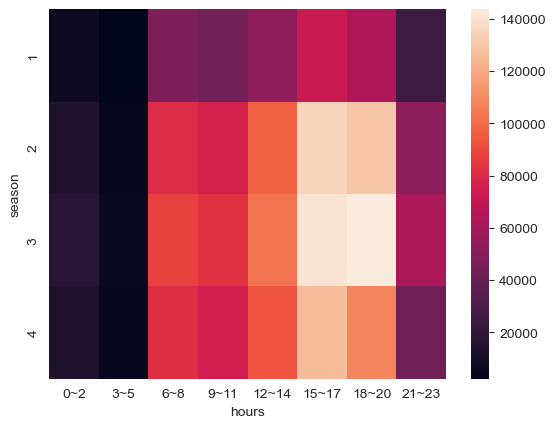

In [135]:
sns.heatmap(data=season_hours)

<Axes: xlabel='hours', ylabel='season'>

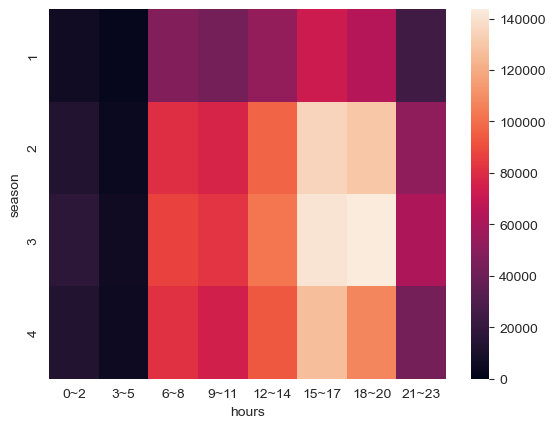

In [137]:
sns.heatmap(data=season_hours, vmin=0, vmax=season_hours.max().max())

#### heatmap()의 annot, fmt 인수
- annot=True : 히트맵의 각 셀에 값 표시
- fmt='d' or 'f' : 히트맵에 표시하는 값의 서식(format) 지정 (정수, 실수)

In [138]:
season_hour_mean = bike.pivot_table('count', index='season', columns='hours', aggfunc='mean')

<Axes: xlabel='hours', ylabel='season'>

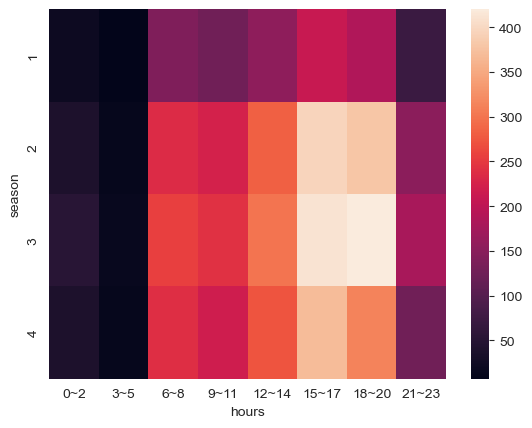

In [140]:
sns.heatmap(season_hour_mean)

<Axes: xlabel='hours', ylabel='season'>

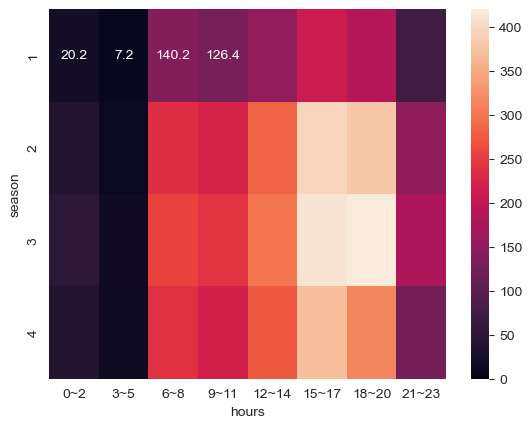

In [145]:
sns.heatmap(data=season_hour_mean, vmin=0, vmax=season_hour_mean.max().max(),
           annot=True,fmt='.1f')

#### sns.heatmap()함수의 cmap인수 사용하여 다른 color map 지정

- color maps in Matplotlib 링크 참고: 
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

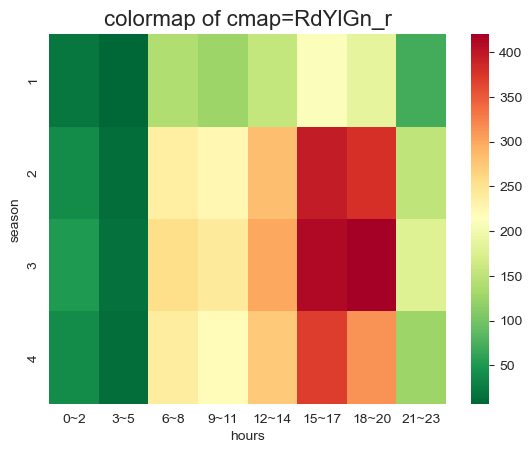

In [146]:
sns.heatmap(season_hour_mean, cmap='RdYlGn_r')
plt.title('colormap of cmap=RdYlGn_r', fontsize=16)
plt.show()

------------------------------------------

### 예제 데이터

- seaborn 패키지의 flights dataset

In [147]:
flights = sns.load_dataset('flights')
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [149]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


**heatmap을 그리기 위한 데이터 테이블 생성**
- pivot 테이블을 이용해서 연도별 각 월 승객수로 구조를 변환

In [151]:
fpivot = flights.pivot(values='passengers',index='month',columns='year')
fpivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


**seaborn.heatmap() 그리기**

<Axes: xlabel='year', ylabel='month'>

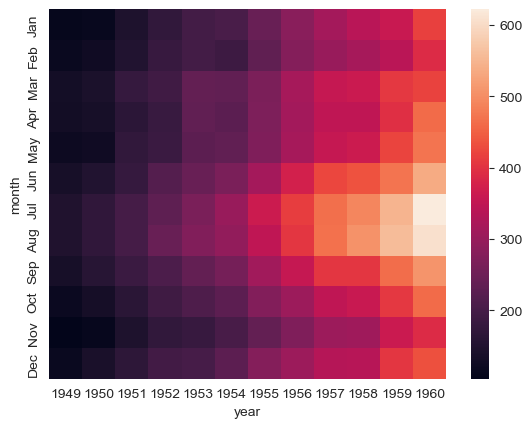

In [152]:
sns.heatmap(fpivot)

----------------------------------------------------